In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox, norm, ks_2samp
from scipy.stats import shapiro, ks_2samp
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import aux_functions_ml as f

In [2]:
df_high_demand_A = pd.read_csv('../Datasets/all_predictions_high_demand_A.csv', index_col=0)
df_products = pd.read_csv('../Datasets/clean_products.csv', index_col=0)
df_orders = pd.read_csv('../Datasets/clean_orders.csv', index_col = 0)
df_order_details = pd.read_csv('../Datasets/clean_order_details.csv', index_col=0)
df_inventory = pd.read_csv('../Datasets/clean_inventory.csv', index_col=0)
df_purchase = pd.read_csv('../Datasets/clean_purchase_orders.csv', index_col=0)


## For productID: 427

In [3]:
df_427 = df_products[df_products['ProductID'] == 427]
df_427

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType
399,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61


In [4]:
df_427 = df_427.merge(df_order_details, on = 'ProductID')
df_427

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType,OrderDetailID,OrderID,QuantitySold,UnitSalesPrice,total_price
0,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,17,4,50,4.1,205.0
1,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,49,5,50,4.1,205.0
2,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,78,7,20,4.1,82.0
3,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,108,8,25,4.1,102.5
4,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,170,13,50,4.1,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,111321,2405,1,7.3,7.3
469,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,111446,2408,1,7.0,7.0
470,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,112624,2430,27,6.0,162.0
471,427,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61,113860,2454,2,7.0,14.0


In [5]:
#ganancia media
df_427['UnitSalesPrice'].mean() - df_427['PurchasePrice'].unique()[0]

np.float64(1.365327695560254)

In [6]:
df_427['QuantitySold'].sum(), df_427['total_price'].sum()

(np.int64(7517), np.float64(34526.2))

In [7]:
#ganancia total

ganancia = df_427['total_price'].sum() - df_427['PurchasePrice'].unique()[0] * df_427['QuantitySold'].sum()
ganancia

np.float64(7464.999999999996)

In [8]:
(ganancia / df_427['total_price'].sum()) * 100 #porcentaje de ganancia 

np.float64(21.621261534718553)

In [9]:
df, lead_time = f.select_products_lead_time(df_products, 427)
df, lead_time

(    ProductID ProductName ModelDescription Category        Gender ProductLine  \
 0         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 1         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 2         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 3         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 4         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 5         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 6         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 7         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 8         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 9         427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 10        427     M-ERK61              ERK   Briefs  Men's Briefs   Underwear   
 11        427  

In [10]:
lead_time_avg, lead_time_std = f.metricas_lead_time(lead_time)
lead_time_avg, lead_time_std

(np.float64(1.6585365853658536), np.float64(7.414882858473089))

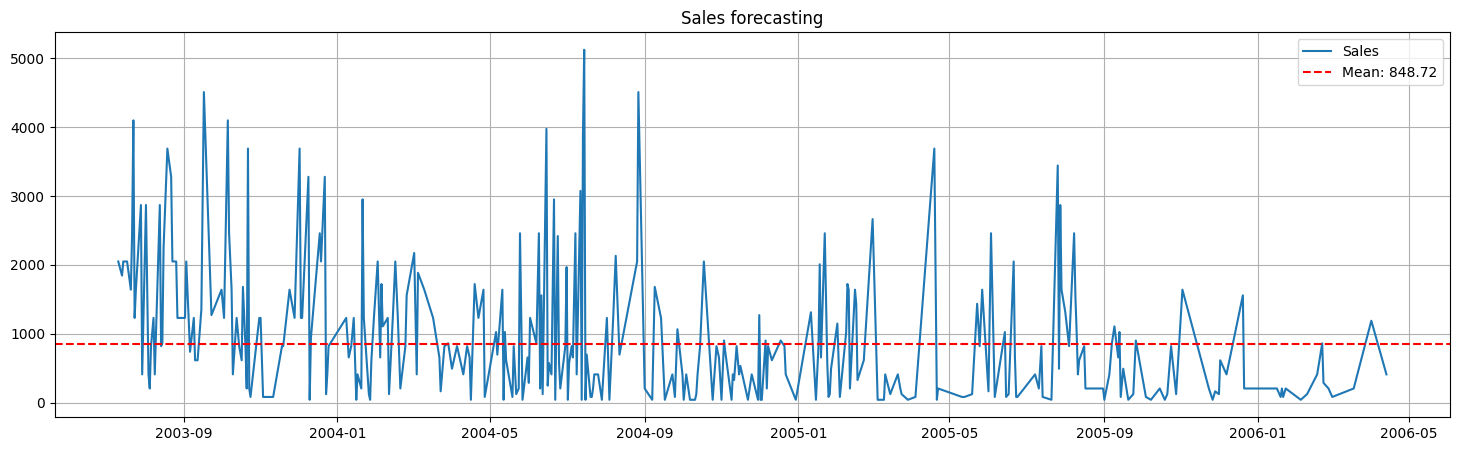

In [11]:
sales = f.demanda(df)

Percentage outliers:  3.7698412698412698


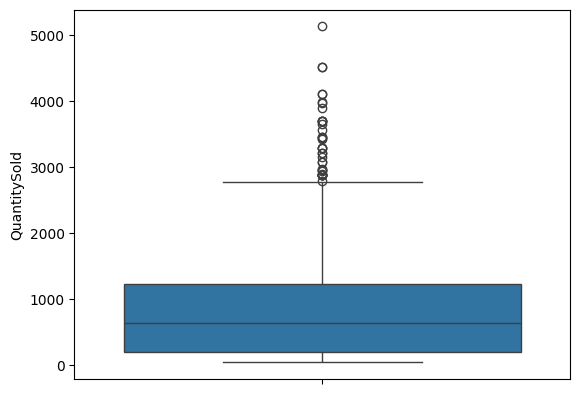

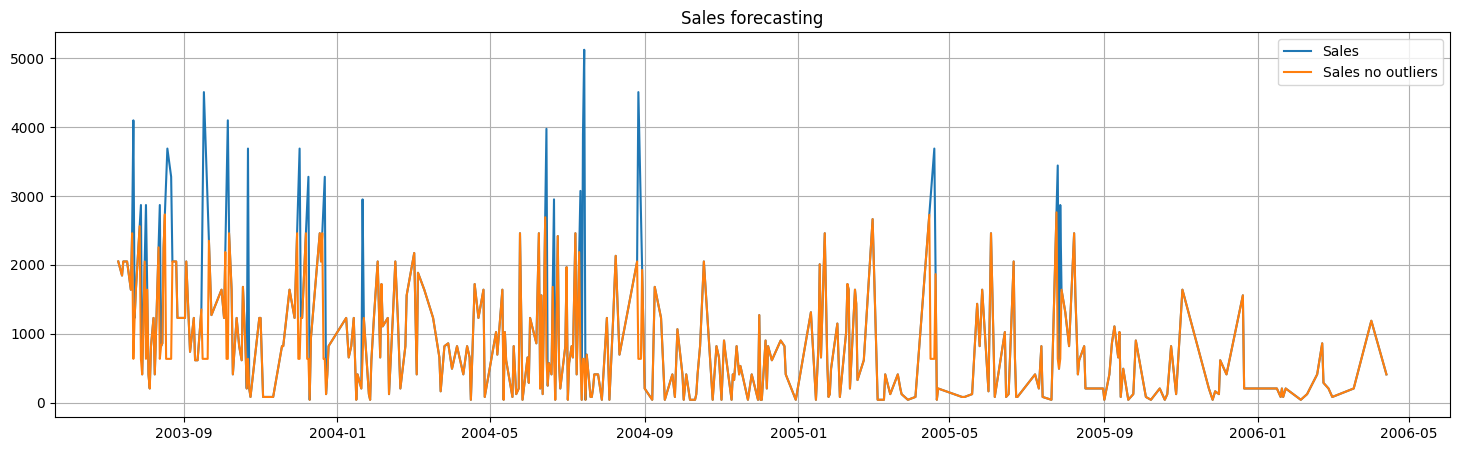

,QuantitySold
OrderDate,
2003-07-11,2050.000000
2003-07-12,1981.666667
2003-07-13,1913.333333
2003-07-14,1845.000000
2003-07-15,2050.000000
...,...
2006-04-09,669.666667
2006-04-10,604.750000
2006-04-11,539.833333


In [12]:
sales = f.estudio_outliers(sales)
sales

p-value Kolmogorov-Smirnov: 0.0
p-value Shapiro-Wilk: 5.973458967758513e-25


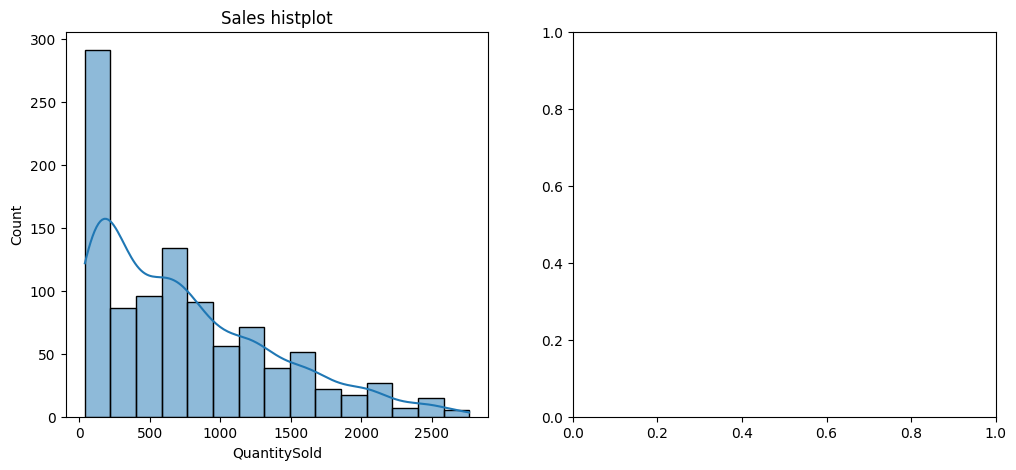

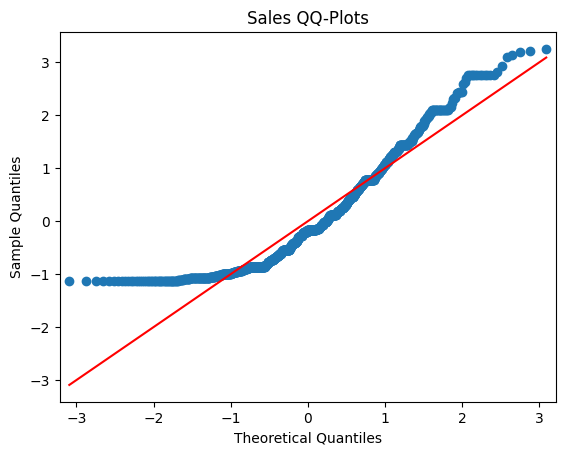

It isn't normal. Applying Box-Cox...
Lambda de Box-Cox: 0.2767904898389381


In [13]:
sales = f.normality_study(sales)

🔹 Reordered dates: [Timestamp('2003-07-12 00:00:00'), Timestamp('2003-07-13 00:00:00'), Timestamp('2003-07-14 00:00:00'), Timestamp('2003-07-15 00:00:00'), Timestamp('2003-07-16 00:00:00'), Timestamp('2003-07-17 00:00:00'), Timestamp('2003-07-18 00:00:00'), Timestamp('2003-07-19 00:00:00'), Timestamp('2003-07-20 00:00:00'), Timestamp('2003-07-21 00:00:00'), Timestamp('2003-07-22 00:00:00'), Timestamp('2003-07-23 00:00:00'), Timestamp('2003-07-24 00:00:00'), Timestamp('2003-07-25 00:00:00'), Timestamp('2003-07-26 00:00:00'), Timestamp('2003-07-27 00:00:00'), Timestamp('2003-07-28 00:00:00'), Timestamp('2003-07-29 00:00:00'), Timestamp('2003-07-30 00:00:00'), Timestamp('2003-07-31 00:00:00'), Timestamp('2003-08-01 00:00:00'), Timestamp('2003-08-02 00:00:00'), Timestamp('2003-08-03 00:00:00'), Timestamp('2003-08-04 00:00:00'), Timestamp('2003-08-05 00:00:00'), Timestamp('2003-08-06 00:00:00'), Timestamp('2003-08-07 00:00:00'), Timestamp('2003-08-08 00:00:00'), Timestamp('2003-08-09 00:00:

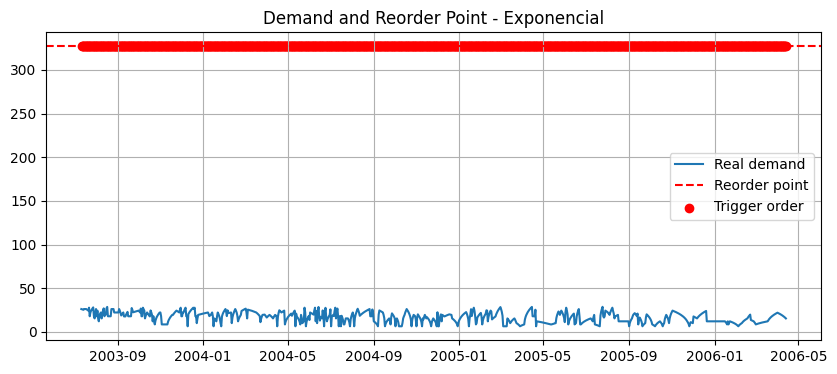

In [14]:
rop_por_producto, security_stocks, fechas_reposicion = f.security_stock(sales, lead_time_avg, lead_time_std)

In [15]:
rop_por_producto

np.float64(327.021453058304)

In [16]:
security_stocks

np.float64(298.7230903164435)

In [17]:
fechas_reposicion

DatetimeIndex(['2003-07-12', '2003-07-13', '2003-07-14', '2003-07-15',
               '2003-07-16', '2003-07-17', '2003-07-18', '2003-07-19',
               '2003-07-20', '2003-07-21',
               ...
               '2006-04-04', '2006-04-05', '2006-04-06', '2006-04-07',
               '2006-04-08', '2006-04-09', '2006-04-10', '2006-04-11',
               '2006-04-12', '2006-04-13'],
              dtype='datetime64[ns]', name='OrderDate', length=1007, freq='D')

### For ProductID = 861

In [18]:
df_861 = df_products[df_products['ProductID'] == 861]
df_861

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType
813,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673


In [19]:
df_861 = df_861.merge(df_order_details, on = 'ProductID')
df_861

,ProductID,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType,OrderDetailID,OrderID,QuantitySold,UnitSalesPrice,total_price
0,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,1308,71,60,5.6,336.0
1,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,3776,190,8,5.6,44.8
2,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,3786,191,30,5.6,168.0
3,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,3818,192,2,5.6,11.2
4,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,5445,258,1,5.6,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,113511,2443,1,9.0,9.0
354,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,113644,2451,1,7.5,7.5
355,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,113805,2454,2,9.0,18.0
356,861,XL-K4673,K,Briefs,Women's Panties,Underwear,557,XL,Dozen,In Production,2003-08-06,4.9,K4673,113950,2455,2,9.0,18.0


In [20]:
#ganancia media
df_861['UnitSalesPrice'].mean() - df_861['PurchasePrice'].unique()[0]

np.float64(2.137150837988826)

In [21]:
df_861['QuantitySold'].sum(), df_861['total_price'].sum()

(np.int64(3236), np.float64(22009.8))

In [22]:
ganancia = df_861['total_price'].sum() - df_861['PurchasePrice'].unique()[0] * df_861['QuantitySold'].sum()
ganancia

np.float64(6153.399999999998)

In [23]:
(ganancia / df_861['total_price'].sum()) * 100 #porcentaje de ganancia 

np.float64(27.957546183972585)

In [24]:
df, lead_time = f.select_products_lead_time(df_products, 861)
df, lead_time

(    ProductID ProductName ModelDescription Category           Gender  \
 0         861    XL-K4673                K   Briefs  Women's Panties   
 1         861    XL-K4673                K   Briefs  Women's Panties   
 2         861    XL-K4673                K   Briefs  Women's Panties   
 3         861    XL-K4673                K   Briefs  Women's Panties   
 4         861    XL-K4673                K   Briefs  Women's Panties   
 5         861    XL-K4673                K   Briefs  Women's Panties   
 6         861    XL-K4673                K   Briefs  Women's Panties   
 7         861    XL-K4673                K   Briefs  Women's Panties   
 8         861    XL-K4673                K   Briefs  Women's Panties   
 9         861    XL-K4673                K   Briefs  Women's Panties   
 10        861    XL-K4673                K   Briefs  Women's Panties   
 11        861    XL-K4673                K   Briefs  Women's Panties   
 12        861    XL-K4673                K   Brief

In [25]:
lead_time

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     9.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
dtype: float64

In [26]:
lead_time_avg, lead_time_std = f.metricas_lead_time(lead_time)
lead_time_avg, lead_time_std

(np.float64(0.23684210526315788), np.float64(1.4599927901768635))

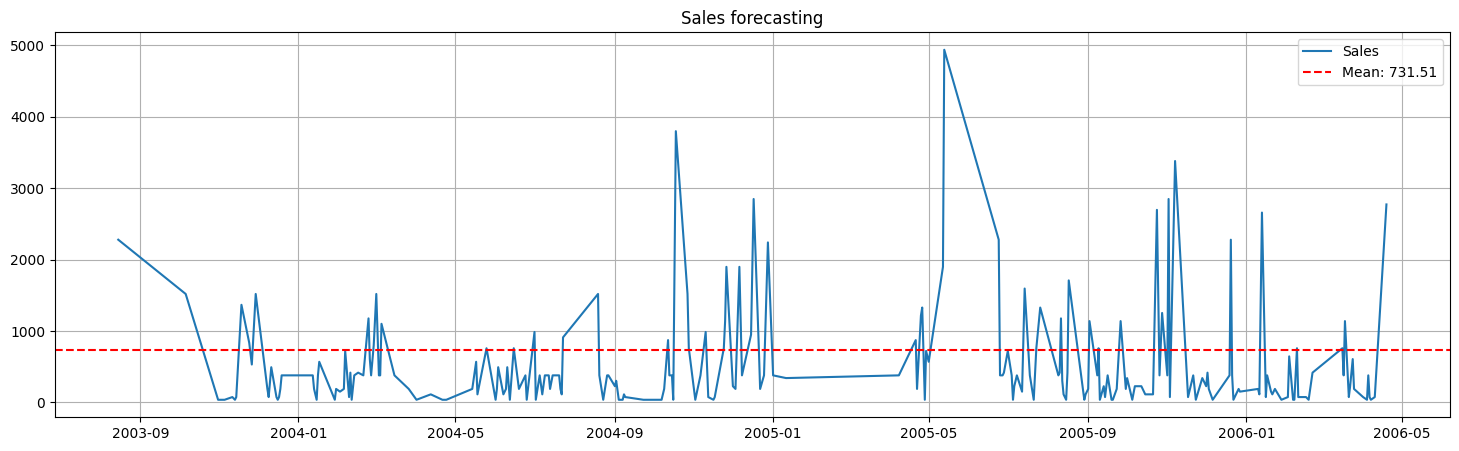

In [27]:
sales = f.demanda(df)

Percentage outliers:  8.375893769152196


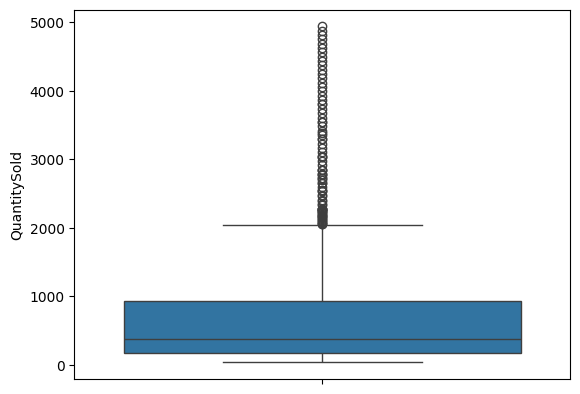

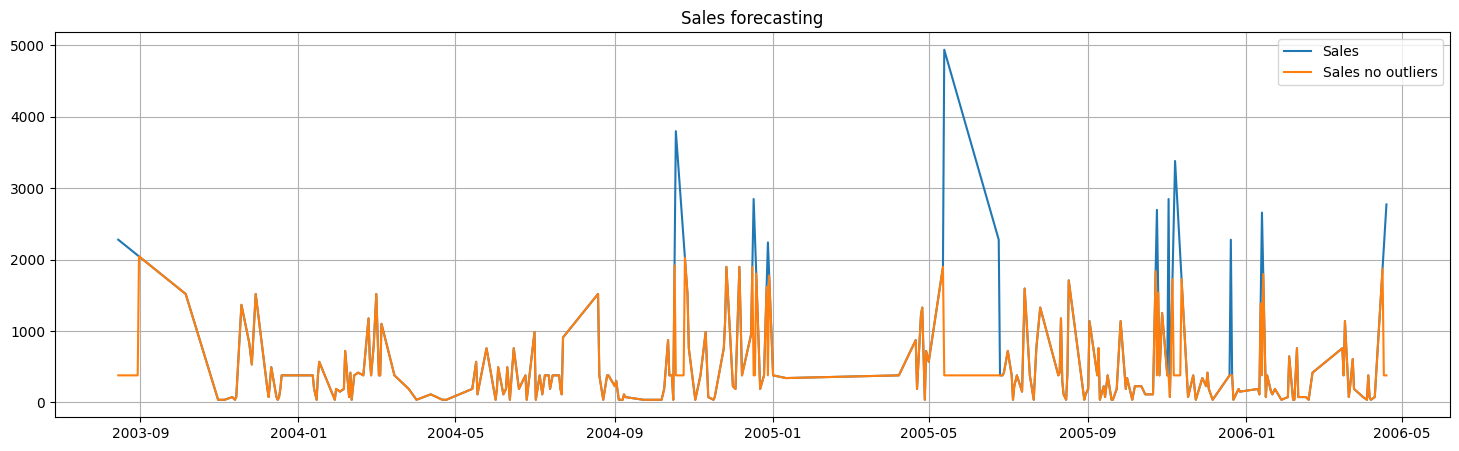

,QuantitySold
OrderDate,
2003-08-15,380.000000
2003-08-16,380.000000
2003-08-17,380.000000
2003-08-18,380.000000
2003-08-19,380.000000
...,...
2006-04-15,1574.888889
2006-04-16,1874.666667
2006-04-17,380.000000


In [28]:
sales = f.estudio_outliers(sales)
sales

p-value Kolmogorov-Smirnov: 0.0
p-value Shapiro-Wilk: 6.187202509908718e-32


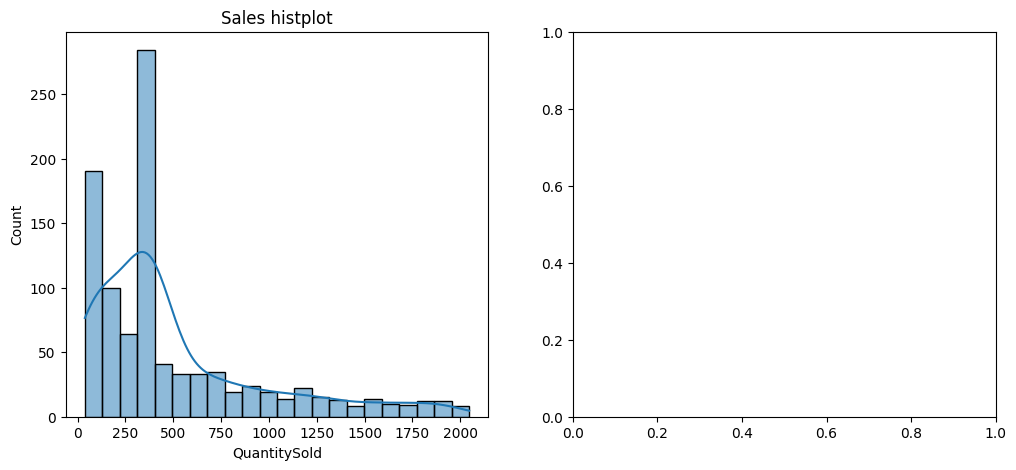

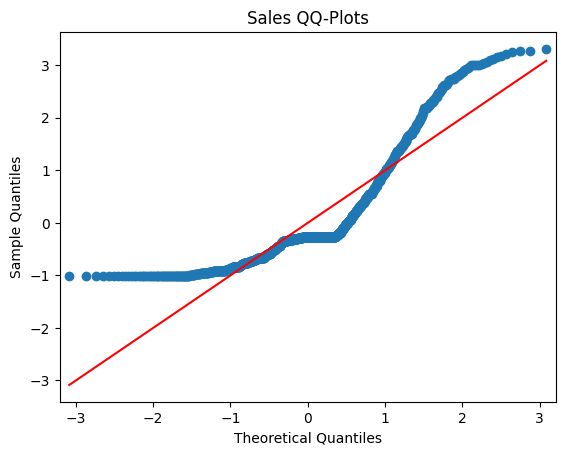

It isn't normal. Applying Box-Cox...
Lambda de Box-Cox: 0.17524297062169425


In [29]:
sales = f.normality_study(sales)

🔹 Reordered dates: [Timestamp('2003-08-15 00:00:00'), Timestamp('2003-08-16 00:00:00'), Timestamp('2003-08-17 00:00:00'), Timestamp('2003-08-18 00:00:00'), Timestamp('2003-08-19 00:00:00'), Timestamp('2003-08-20 00:00:00'), Timestamp('2003-08-21 00:00:00'), Timestamp('2003-08-22 00:00:00'), Timestamp('2003-08-23 00:00:00'), Timestamp('2003-08-24 00:00:00'), Timestamp('2003-08-25 00:00:00'), Timestamp('2003-08-26 00:00:00'), Timestamp('2003-08-27 00:00:00'), Timestamp('2003-08-28 00:00:00'), Timestamp('2003-08-29 00:00:00'), Timestamp('2003-08-30 00:00:00'), Timestamp('2003-08-31 00:00:00'), Timestamp('2003-09-01 00:00:00'), Timestamp('2003-09-02 00:00:00'), Timestamp('2003-09-03 00:00:00'), Timestamp('2003-09-04 00:00:00'), Timestamp('2003-09-05 00:00:00'), Timestamp('2003-09-06 00:00:00'), Timestamp('2003-09-07 00:00:00'), Timestamp('2003-09-08 00:00:00'), Timestamp('2003-09-09 00:00:00'), Timestamp('2003-09-10 00:00:00'), Timestamp('2003-09-11 00:00:00'), Timestamp('2003-09-12 00:00:

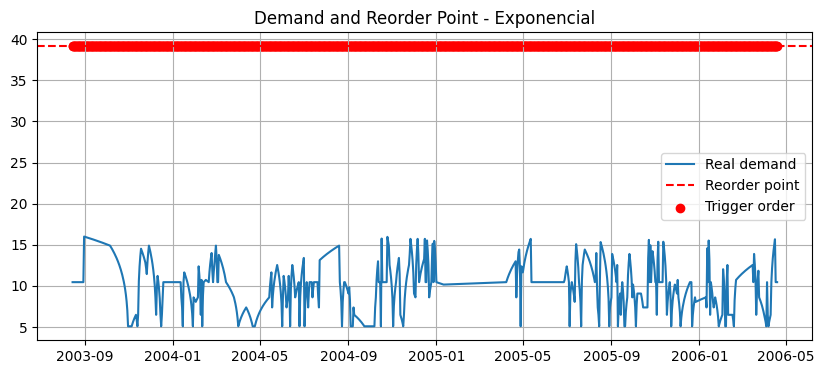

In [30]:
rop_por_producto, security_stocks, fechas_reposicion = f.security_stock(sales, lead_time_avg, lead_time_std)

In [32]:
sales

,QuantitySold,SeasonalDemand,AccumulativeStock,TriggerOrder
OrderDate,,,,
2003-08-15,10.453897,10.660555,28.476505,True
2003-08-16,10.453897,10.849153,17.627353,True
2003-08-17,10.453897,10.707538,6.919815,True
2003-08-18,10.453897,10.341036,-3.421222,True
2003-08-19,10.453897,10.086153,-13.507374,True
...,...,...,...,...
2006-04-15,15.026294,14.876568,-9951.068254,True
2006-04-16,15.669139,16.344809,-9967.413063,True
2006-04-17,10.453897,10.819778,-9978.232841,True
